-------------------------plot dei dati------------------------


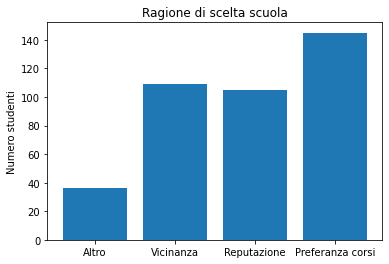

-------------------------Stampo i theta--------------------------
[ 1.01580247e+01 -1.44641831e-01 -7.23576347e-02 -2.25320544e-01
  2.83592151e-02  2.54859709e-02 -5.69751179e-02  1.34192959e-01
 -1.32353092e-01  1.98695370e-02 -6.16559379e-02 -1.57240435e-02
  8.35044091e-02  4.61130005e-02 -6.95014252e-02 -1.33026009e-01
  1.71128164e-01  7.84006742e-02  5.36868314e-02 -1.63911541e-01
 -9.20542947e-02  3.31084869e-02 -5.43132365e-02 -1.41920217e-01
  3.01017458e-01  5.82027951e-02 -1.43368297e-03 -1.31797993e-01
  2.03063194e-01  7.83979419e-02  3.53300237e-01  8.35230622e-01
  3.32047214e+00  1.46386631e-03 -2.83727488e-02]
----------------------Grafico di convergenza-------------------------


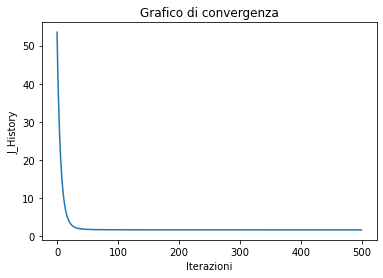

In [1]:
import pandas as pa
import numpy as np
import csv
import matplotlib.pyplot as plt
with open("D:\Download\ex_1\student-mat.csv", newline="", encoding="ISO-8859-1") as filecsv: #eseguo import dei dati dal file csv
    DATI = pa.read_csv("D:\Download\ex_1\student-mat.csv") 
    X = DATI.iloc[:,0:32]
    y = DATI["G3"]

#plot dei dati, ossia i criteri di scelta delle scuole
print("-------------------------plot dei dati------------------------")
colonnaReason = X.loc[:,["reason"]]
contatoreOther = int((colonnaReason[colonnaReason["reason"] == 0]).count())
contatoreHome = int((colonnaReason[colonnaReason["reason"] == 1]).count())          
contatoreReputation = int((colonnaReason[colonnaReason["reason"] == 2]).count())
contatoreCourse = int((colonnaReason[colonnaReason["reason"] == 3]).count())
plt.bar(["Altro", "Vicinanza", "Reputazione", "Preferanza corsi"], [contatoreOther, contatoreHome, contatoreReputation, contatoreCourse]) 
plt.title("Ragione di scelta scuola")
plt.ylabel("Numero studenti") 
plt.show()

x1New = X["Medu"] + X["Fedu"]
x2New = X["Mjob"] + X["Fjob"]
X["Family education"] = x1New               #Feature generation
X["Family economy"] = x2New
X_Numpy = X.to_numpy(float)
y_Numpy = y.to_numpy(float)

def featureNormalize(X):
    X_norm = X
    mu = X.mean(0)
    sigma = X.std(0)                               #implemento la feature normalize
    r,c = X.shape
    for i in range(c):
        X_norm[:,i] = ((X[:,i] - mu[i]) / sigma[i])
    return X_norm


X_norm = featureNormalize(X_Numpy)
X_norm = np.insert(X_norm, 0, 1, axis = 1)

def costFunction(X, y, theta):
    m = len(y)
    h = np.dot(X,theta)                           #Algoritmo della cost function
    squaredErrors = (h-y)**2
    J = (1 / (2 * m)) * sum(squaredErrors)
    return J

m,n = X_norm.shape
alpha = 0.08
iterations = 500
theta_init = np.zeros(n)
lampda = 10

def gradientDescend(X, y, theta, alpha, num_iters, lampda):
    m = len(y);
    alpham = alpha/m;
    J_history = np.zeros(num_iters)
    theta_history = np.zeros((num_iters, len(theta)))
    for i in range(num_iters):                           #Algoritmo del gradient descent normalizzato per regressione lineare
        h = np.dot(X,theta)
        theta = theta * (1 - (alpham * lampda)) - (alpham) * np.dot(np.transpose(X),(h-y))
        J_history[i] = costFunction(X, y, theta)
        theta_history[i,:] = theta
    return theta, J_history, theta_history


 
theta, J_history, theta_history = gradientDescend(X_norm, y, theta_init, alpha, iterations, lampda)
print("-------------------------Stampo i theta--------------------------")
print(theta)
print("----------------------Grafico di convergenza-------------------------")      
x = np.arange(0, iterations)
plt.plot(x, J_history)
plt.title("Grafico di convergenza")               #Disegno il grafico di convergenza
plt.xlabel("Iterazioni") 
plt.ylabel("J_History")
plt.show()

PREDICT_X = X_norm[0:10,:]
predict = np.round(np.dot(PREDICT_X, theta))                       #Prediction
error = predict - y[0:10]
absErr = np.abs(error)
#print(absErr)

